In [20]:
!pip install --user featuretools

  Using cached featuretools-1.31.0-py3-none-any.whl (587 kB)
  Using cached woodwork-0.31.0-py3-none-any.whl (215 kB)
  Using cached scipy-1.13.1-cp39-cp39-win_amd64.whl (46.2 MB)
  Using cached pandas-2.2.2-cp39-cp39-win_amd64.whl (11.6 MB)
  Using cached scikit_learn-1.5.1-cp39-cp39-win_amd64.whl (11.0 MB)
  Using cached joblib-1.4.2-py3-none-any.whl (301 kB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
streamlit 1.32.2 requires numpy<2,>=1.19.3, but you have numpy 2.0.1 which is incompatible.


In [1]:
#importing needed libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [2]:
var_def = pd.read_csv('variable_definitions.csv')
var_def

,Variable,Description
0,ID,The IDs take the form of [area ID]_yyyy-mm-dd....
1,area,Area ID
2,date,The date that the data is aggregated over
3,lat,Latitude of the center of the area
4,lon,Longitude of the center of the area
5,burn_area,Percentage of the area burnt
6,climate_aet,"Actual evapotranspiration, derived using a one..."
7,climate_def,"Climate water deficit, derived using a one-dim..."
8,climate_pdsi,Palmer Drought Severity Index
9,climate_pet,Reference evapotranspiration (ASCE Penman-Mont...


In [3]:
#loading dataset
train_data = pd.read_csv('Train.csv')
train_data.head()

,ID,lat,lon,burn_area,climate_aet,climate_def,climate_pdsi,climate_pet,climate_pr,climate_ro,...,landcover_0,landcover_1,landcover_2,landcover_3,landcover_4,landcover_5,landcover_6,landcover_7,landcover_8,precipitation
0,0_2001-01-01,-15.858835,29.237029,0.0,1195,0,263,1195,206,10,...,0.0,0.0,0.018654,0.0,0.714446,0.012174,0.244890,0.009836,0.0,0.256932
1,1_2001-01-01,-15.858835,29.487029,0.0,1196,0,232,1196,201,10,...,0.0,0.0,0.000000,0.0,0.654783,0.000095,0.345121,0.000000,0.0,0.273093
2,2_2001-01-01,-15.858835,29.737029,0.0,1190,0,314,1190,192,10,...,0.0,0.0,0.000000,0.0,0.516421,0.000000,0.483579,0.000000,0.0,0.285109
3,3_2001-01-01,-15.858835,29.987029,0.0,1144,0,321,1144,186,66,...,0.0,0.0,0.000000,0.0,0.299000,0.163902,0.537098,0.000000,0.0,0.298418
4,4_2001-01-01,-15.858835,30.237029,0.0,1187,0,413,1187,186,9,...,0.0,0.0,0.000000,0.0,0.277392,0.067742,0.654866,0.000000,0.0,0.315621


In [4]:
#exploring datasets
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83148 entries, 0 to 83147
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             83148 non-null  object 
 1   lat            83148 non-null  float64
 2   lon            83148 non-null  float64
 3   burn_area      83148 non-null  float64
 4   climate_aet    83148 non-null  int64  
 5   climate_def    83148 non-null  int64  
 6   climate_pdsi   83148 non-null  int64  
 7   climate_pet    83148 non-null  int64  
 8   climate_pr     83148 non-null  int64  
 9   climate_ro     83148 non-null  int64  
 10  climate_soil   83148 non-null  int64  
 11  climate_srad   83148 non-null  int64  
 12  climate_swe    83148 non-null  int64  
 13  climate_tmmn   83148 non-null  int64  
 14  climate_tmmx   83148 non-null  int64  
 15  climate_vap    83148 non-null  int64  
 16  climate_vpd    83148 non-null  int64  
 17  climate_vs     83148 non-null  int64  
 18  elevat

In [5]:
train_data.shape

(83148, 29)

In [6]:
train_data.describe()

,lat,lon,burn_area,climate_aet,climate_def,climate_pdsi,climate_pet,climate_pr,climate_ro,climate_soil,...,landcover_0,landcover_1,landcover_2,landcover_3,landcover_4,landcover_5,landcover_6,landcover_7,landcover_8,precipitation
count,83148.000000,83148.000000,83148.000000,83148.000000,83148.000000,83148.000000,83148.000000,83148.000000,83148.000000,83148.000000,...,83148.000000,83148.000000,83148.000000,8.314800e+04,83148.000000,83148.000000,83148.000000,83148.000000,83148.000000,83148.000000
mean,-19.014557,29.860856,0.007632,484.491124,828.892721,-30.806237,1313.382992,54.576322,6.215134,305.477919,...,0.006158,0.000017,0.008583,4.066313e-08,0.160628,0.037453,0.785382,0.000354,0.001424,0.078551
std,1.588444,1.751090,0.029226,470.467480,546.934469,235.802930,315.209838,71.997561,21.480399,400.956123,...,0.053111,0.000141,0.059046,3.535121e-06,0.192957,0.106050,0.233953,0.001773,0.014233,0.104464
min,-22.358835,25.487029,0.000000,0.000000,0.000000,-563.000000,587.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000019,0.000000,0.000000,0.000000
25%,-20.358835,28.487029,0.000000,50.000000,375.000000,-212.000000,1081.000000,1.000000,0.000000,70.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.014993,0.000000,0.655322,0.000000,0.000000,0.002017
50%,-18.858835,29.987029,0.000000,302.000000,858.000000,-108.000000,1290.000000,22.000000,1.000000,149.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.076706,0.000139,0.880600,0.000000,0.000000,0.028503
75%,-17.858835,31.237029,0.000000,931.000000,1211.000000,142.000000,1517.000000,87.000000,4.000000,329.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.246498,0.015166,0.971209,0.000000,0.000000,0.125500
max,-15.858835,32.987029,0.843886,1713.000000,2614.000000,851.000000,2620.000000,501.000000,342.000000,3319.000000,...,0.828131,0.004918,0.711603,3.073689e-04,0.981472,0.881323,1.000000,0.016708,0.301823,0.801328


In [7]:
#understanding individual columns
train_data.nunique()

ID               83148
lat                 27
lon                 31
burn_area        16152
climate_aet       1584
climate_def       2348
climate_pdsi      1249
climate_pet       1779
climate_pr         420
climate_ro         272
climate_soil      2028
climate_srad      1781
climate_swe          1
climate_tmmn       219
climate_tmmx       254
climate_vap       1974
climate_vpd        308
climate_vs         327
elevation          533
landcover_0        229
landcover_1         65
landcover_2        774
landcover_3          2
landcover_4       6532
landcover_5       3053
landcover_6       6860
landcover_7        272
landcover_8        119
precipitation    80594
dtype: int64

## EDA and Feature Engineering

In [8]:
train_data.head()

,ID,lat,lon,burn_area,climate_aet,climate_def,climate_pdsi,climate_pet,climate_pr,climate_ro,...,landcover_0,landcover_1,landcover_2,landcover_3,landcover_4,landcover_5,landcover_6,landcover_7,landcover_8,precipitation
0,0_2001-01-01,-15.858835,29.237029,0.0,1195,0,263,1195,206,10,...,0.0,0.0,0.018654,0.0,0.714446,0.012174,0.244890,0.009836,0.0,0.256932
1,1_2001-01-01,-15.858835,29.487029,0.0,1196,0,232,1196,201,10,...,0.0,0.0,0.000000,0.0,0.654783,0.000095,0.345121,0.000000,0.0,0.273093
2,2_2001-01-01,-15.858835,29.737029,0.0,1190,0,314,1190,192,10,...,0.0,0.0,0.000000,0.0,0.516421,0.000000,0.483579,0.000000,0.0,0.285109
3,3_2001-01-01,-15.858835,29.987029,0.0,1144,0,321,1144,186,66,...,0.0,0.0,0.000000,0.0,0.299000,0.163902,0.537098,0.000000,0.0,0.298418
4,4_2001-01-01,-15.858835,30.237029,0.0,1187,0,413,1187,186,9,...,0.0,0.0,0.000000,0.0,0.277392,0.067742,0.654866,0.000000,0.0,0.315621


In [9]:
#convert ID to datetime and extract month and year
train_data['date'] = train_data['ID'].apply(lambda x: x.split('_')[1])
train_data['date'] = pd.to_datetime(train_data['date'])
#Extracting year and month
train_data['year'] = train_data['date'].dt.year
train_data['month'] = train_data['date'].dt.month

In [10]:
#separating numerical and categorical columns
num_col =train_data.select_dtypes(include=np.number).columns.tolist()
cat_col =train_data.select_dtypes(include = ['object']).columns

lat
Skew: -0.05


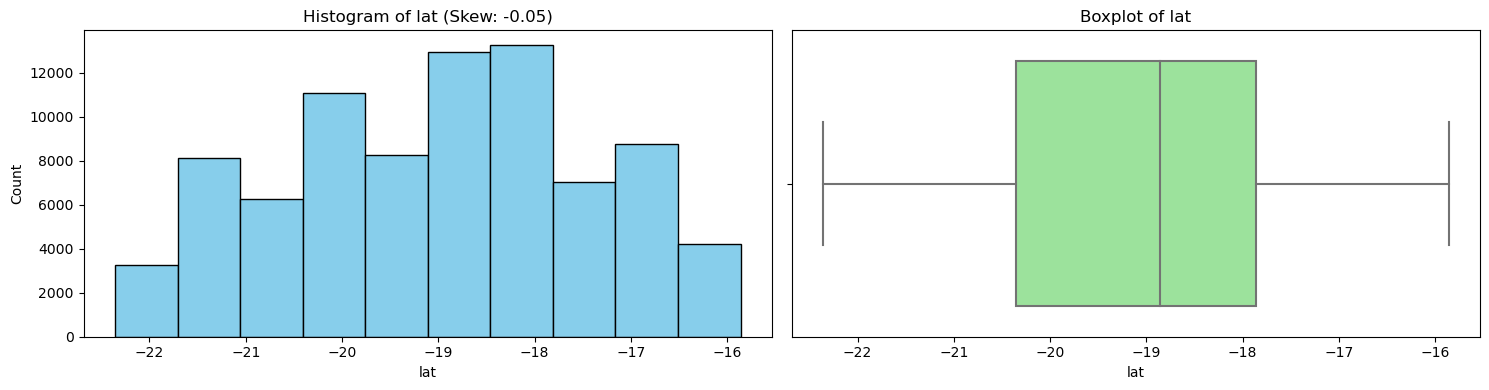

lon
Skew: -0.29


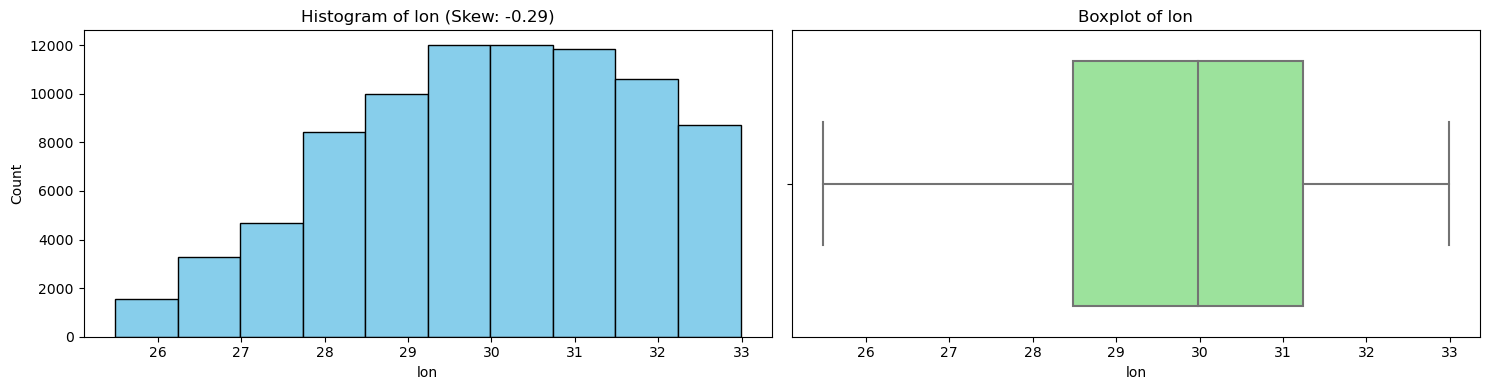

burn_area
Skew: 7.68


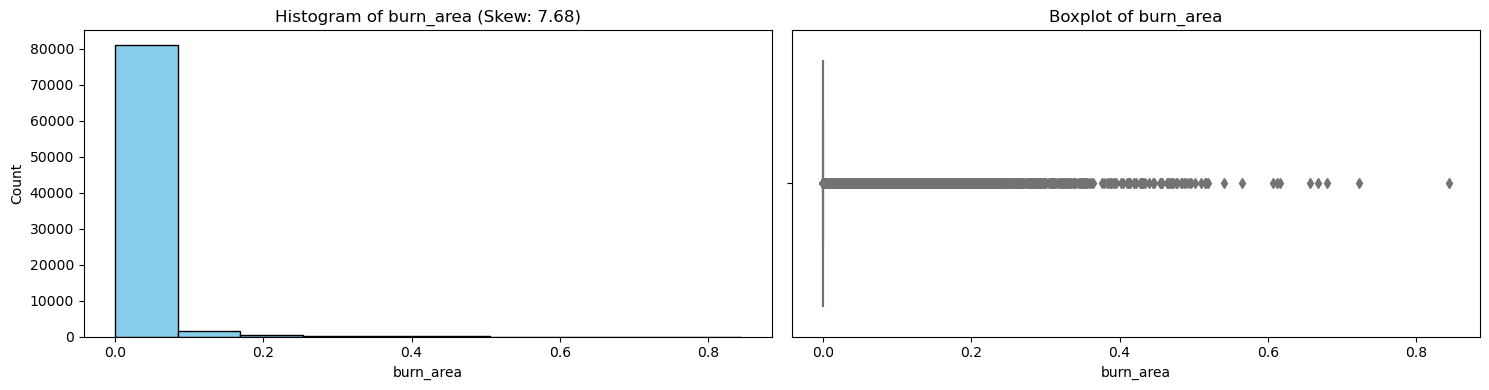

climate_aet
Skew: 0.58


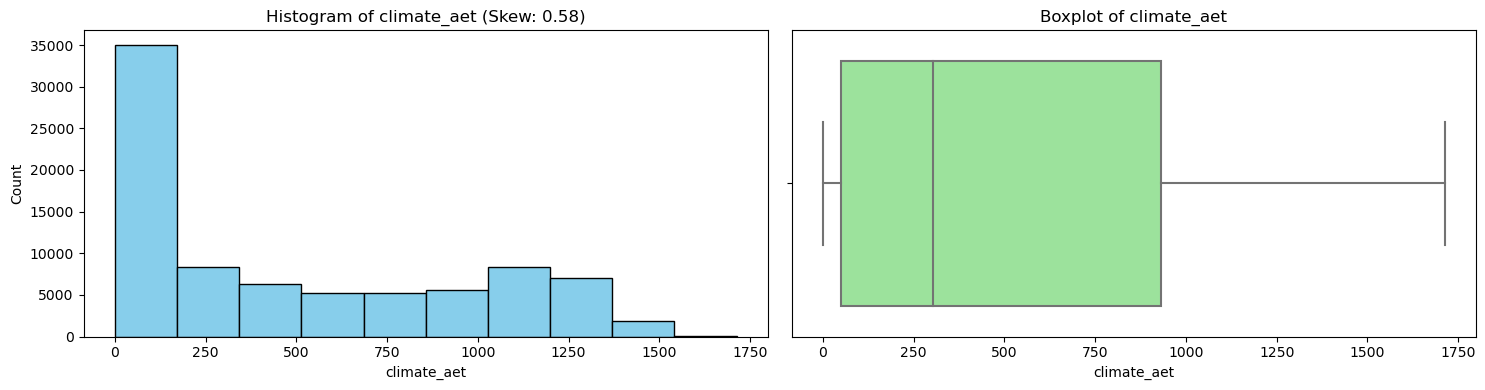

climate_def
Skew: 0.09


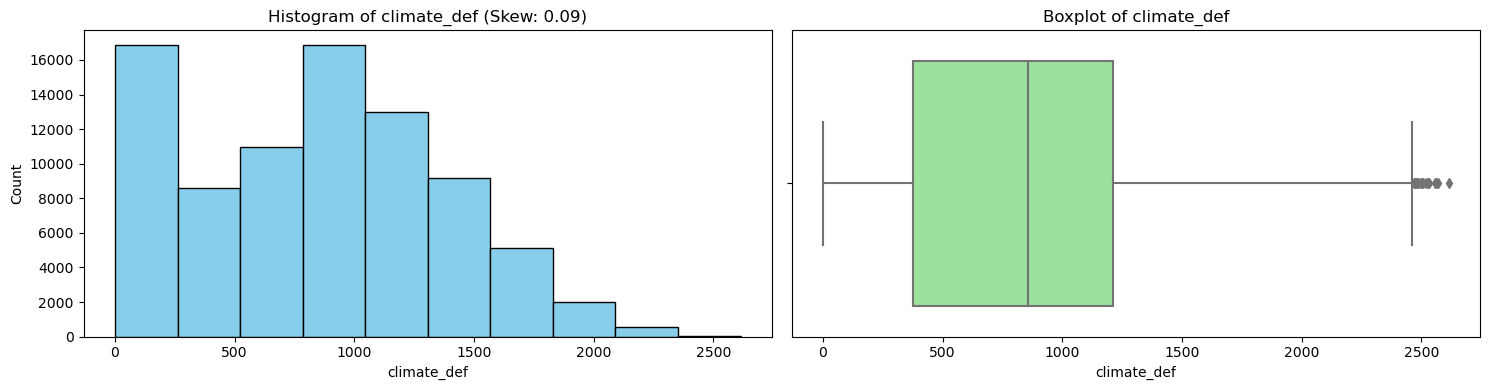

climate_pdsi
Skew: 0.66


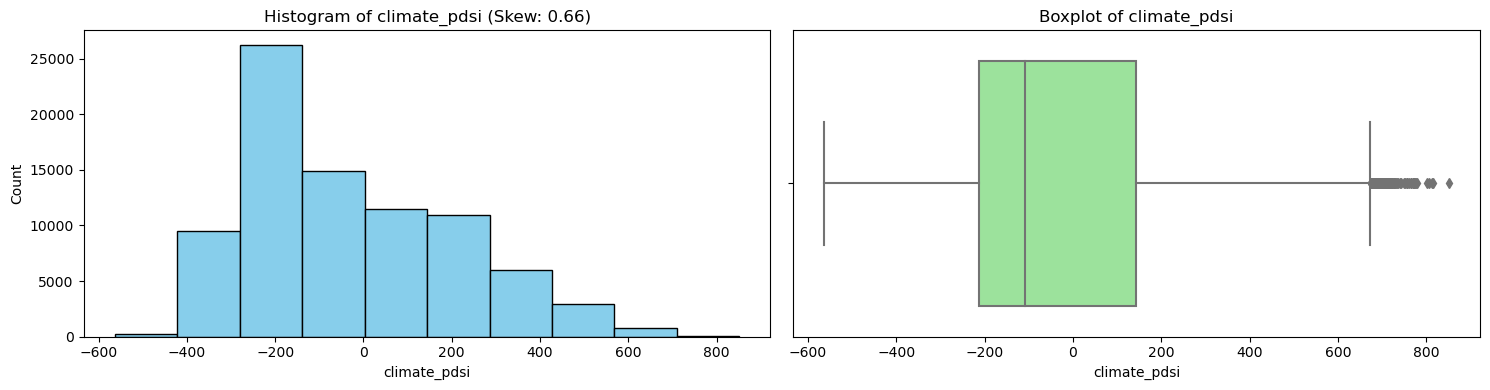

climate_pet
Skew: 0.42


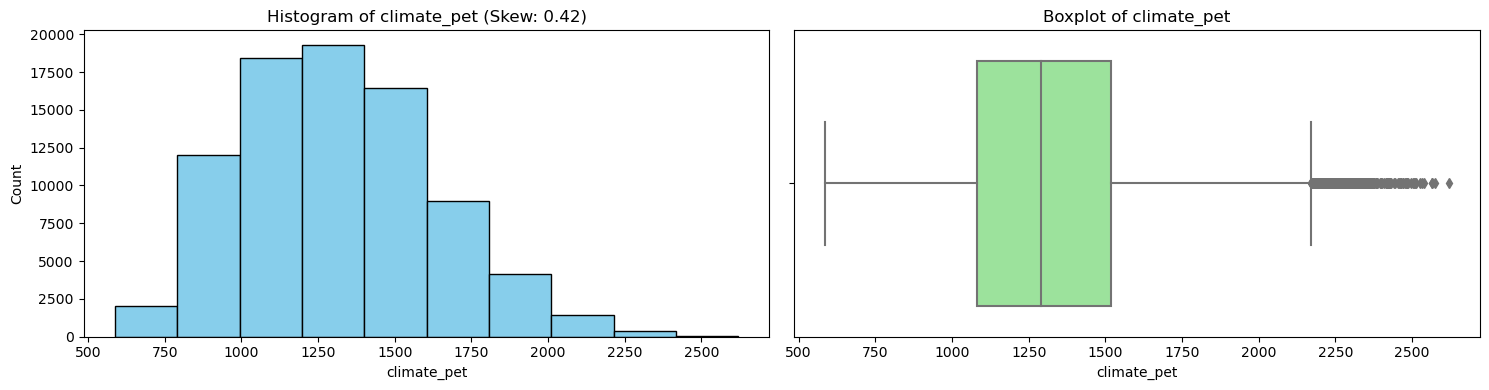

climate_pr
Skew: 1.7


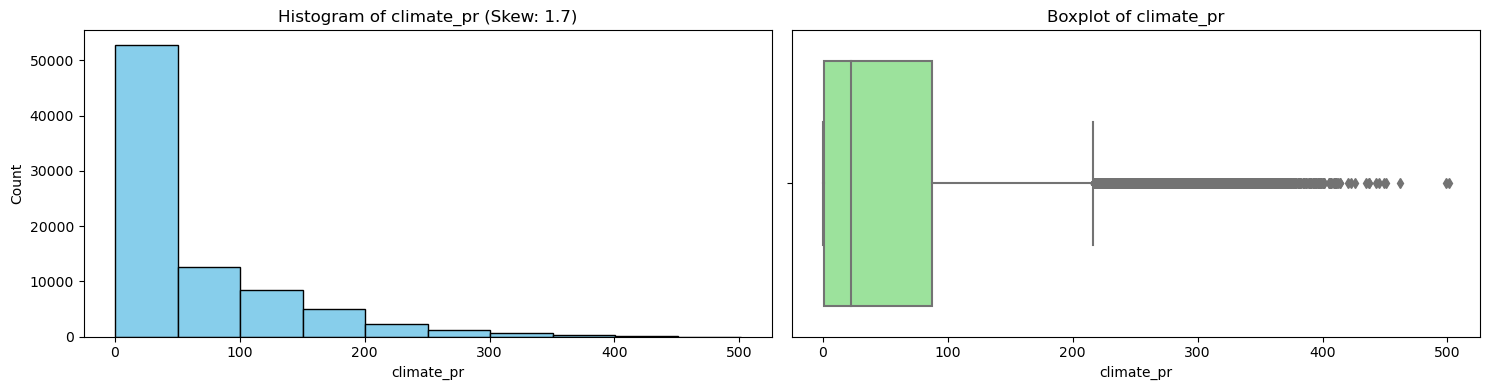

climate_ro
Skew: 6.6


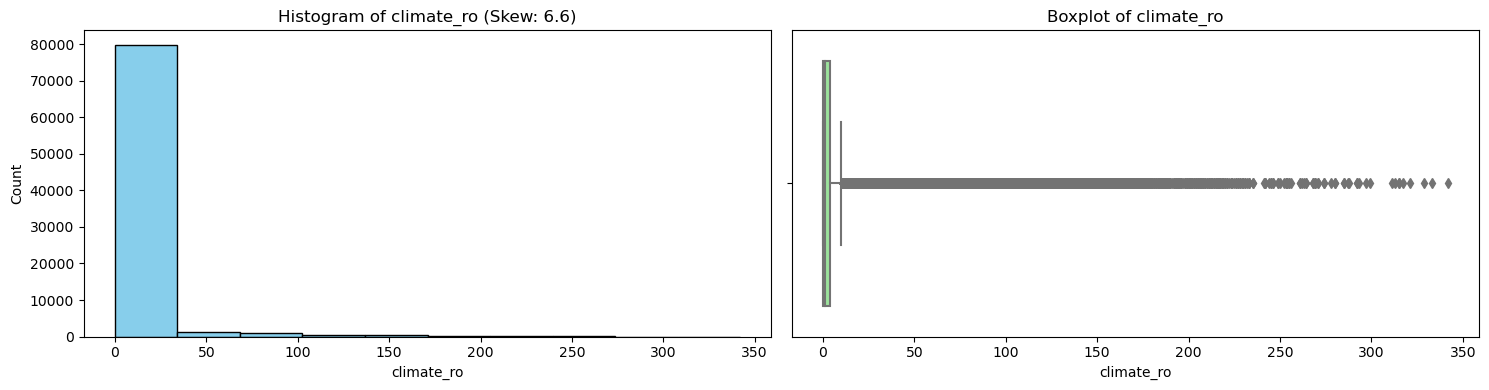

climate_soil
Skew: 2.3


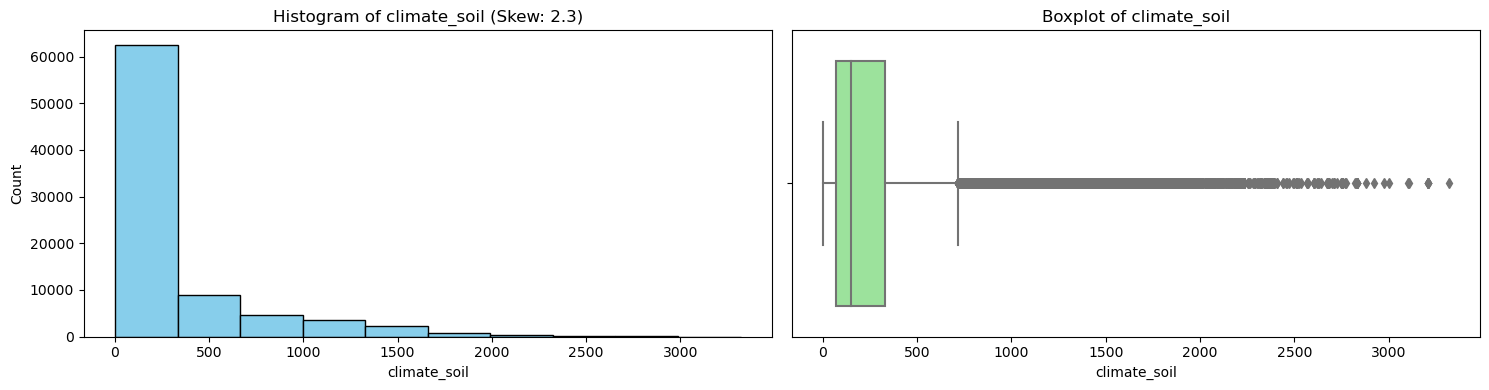

climate_srad
Skew: 0.02


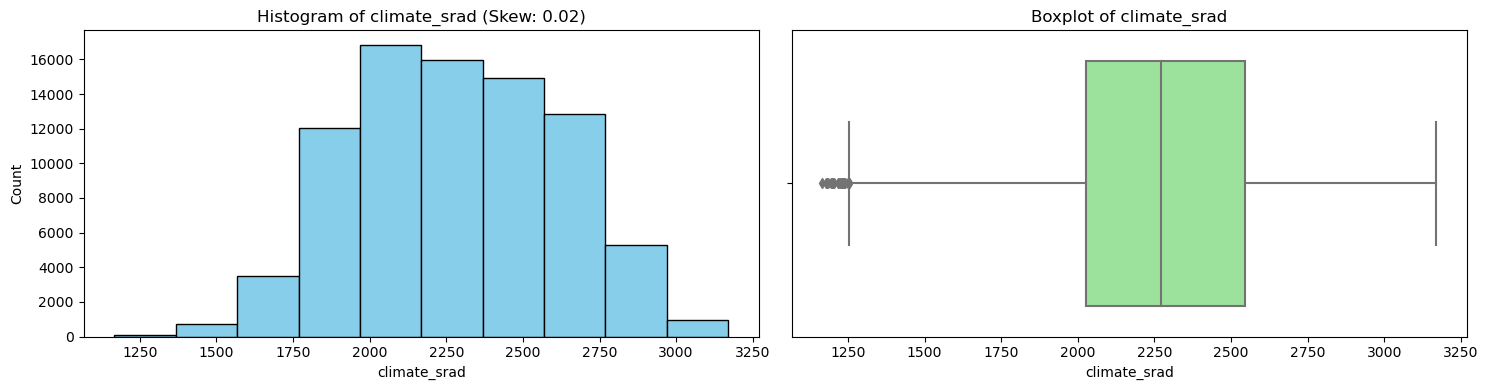

climate_swe
Skew: 0


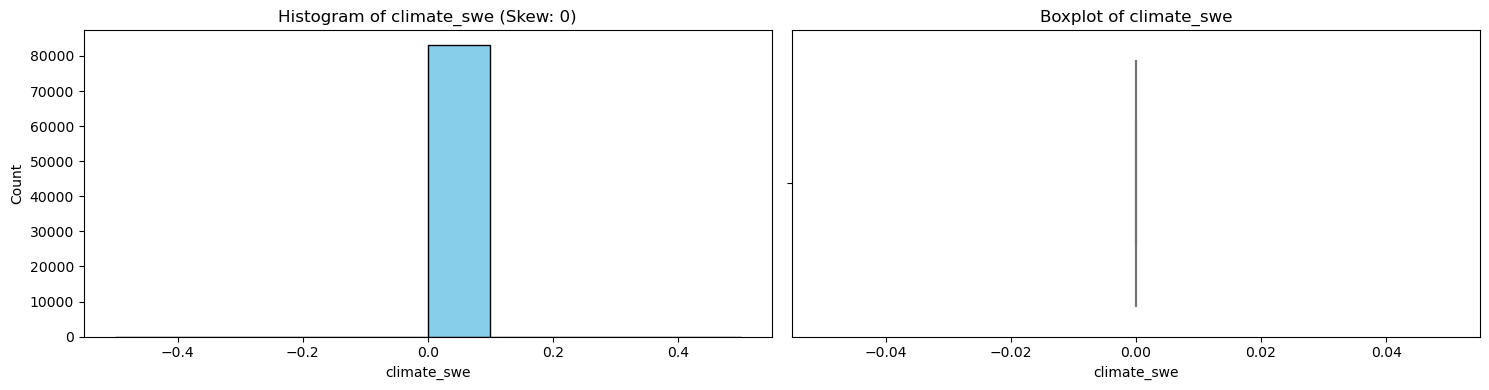

climate_tmmn
Skew: -0.31


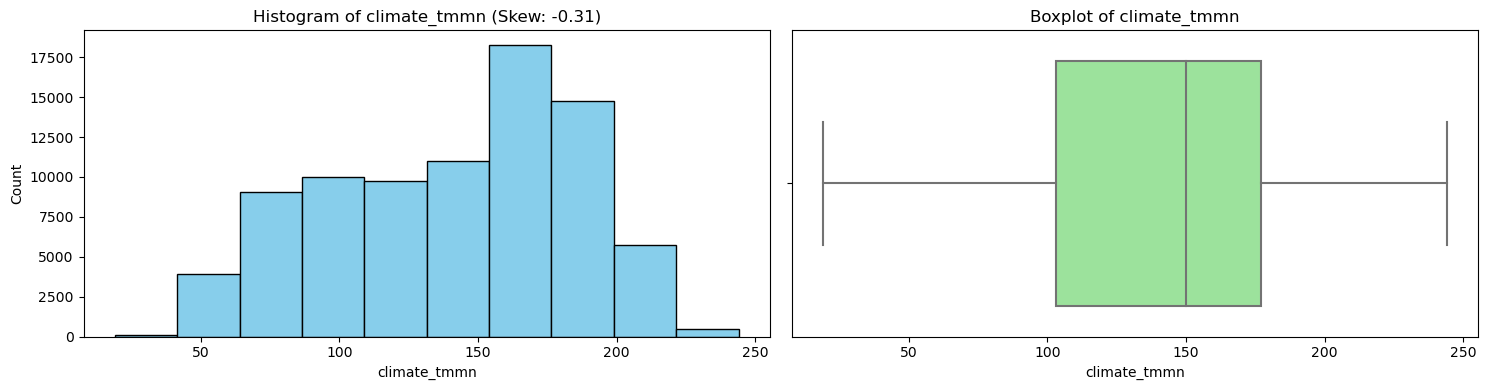

climate_tmmx
Skew: -0.22


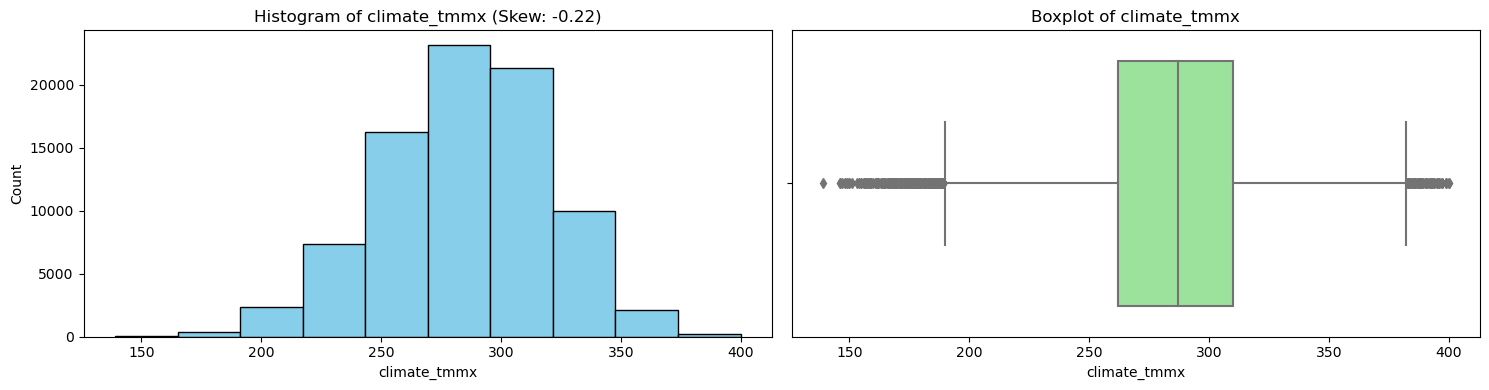

climate_vap
Skew: 0.15


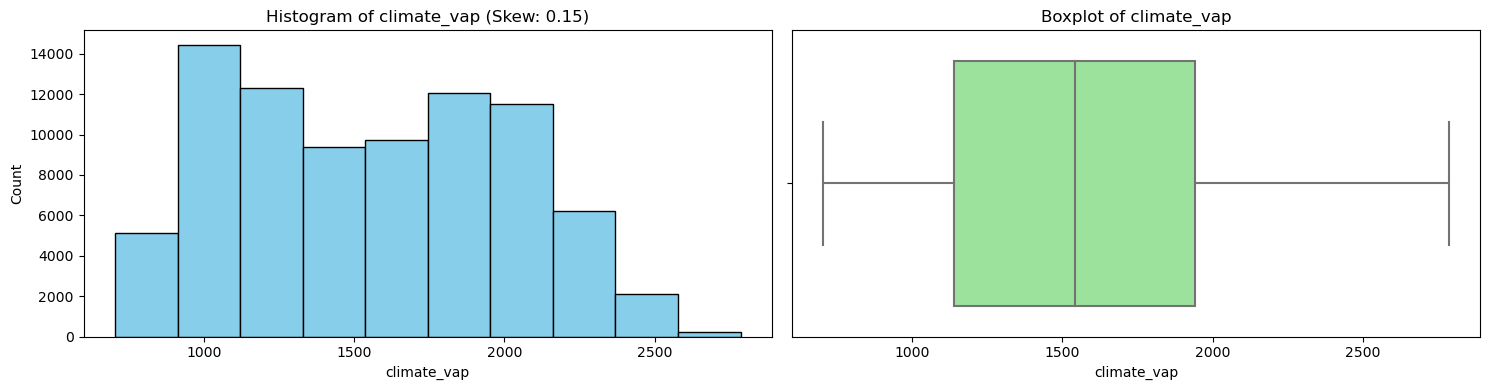

climate_vpd
Skew: 1.13


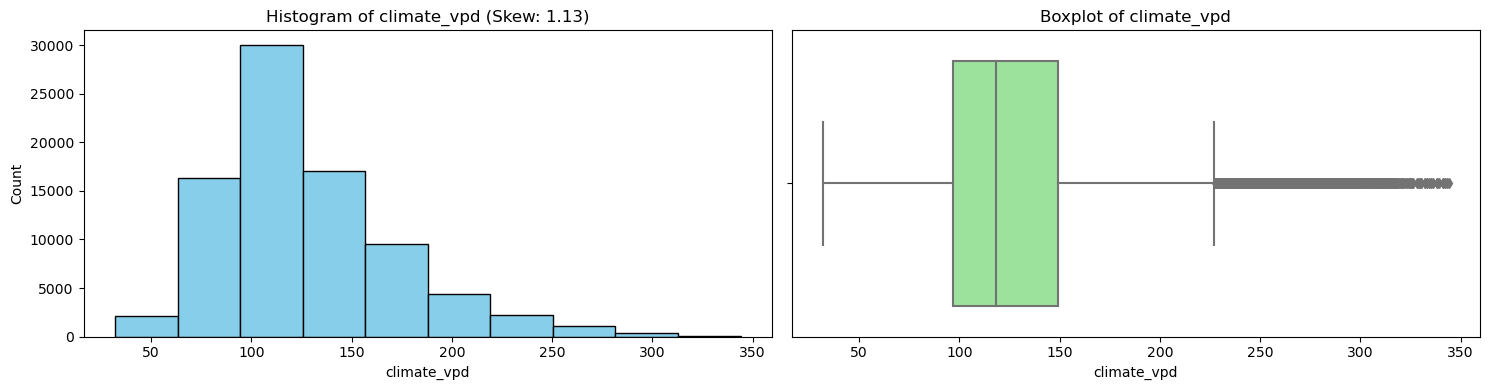

climate_vs
Skew: 0.24


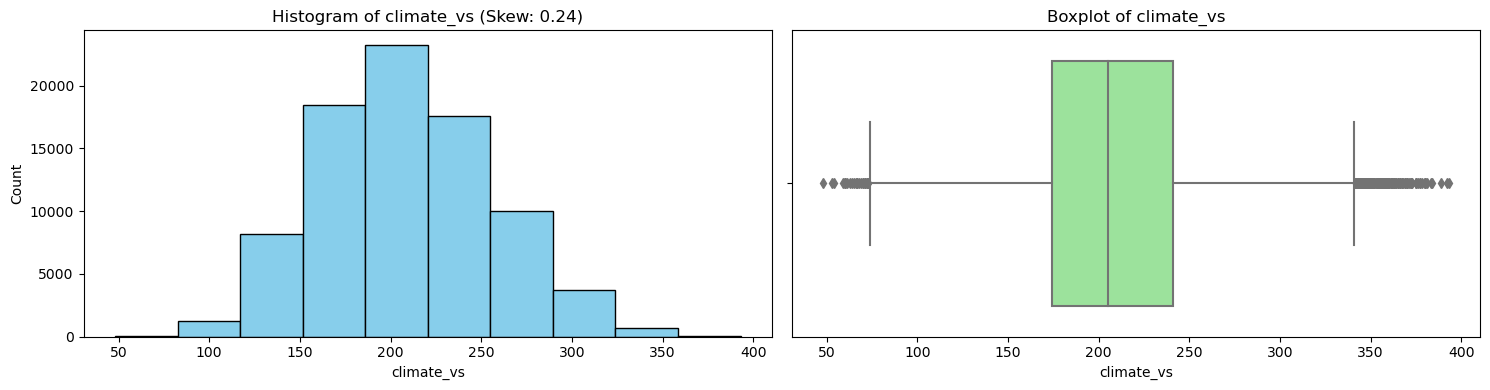

elevation
Skew: -0.31


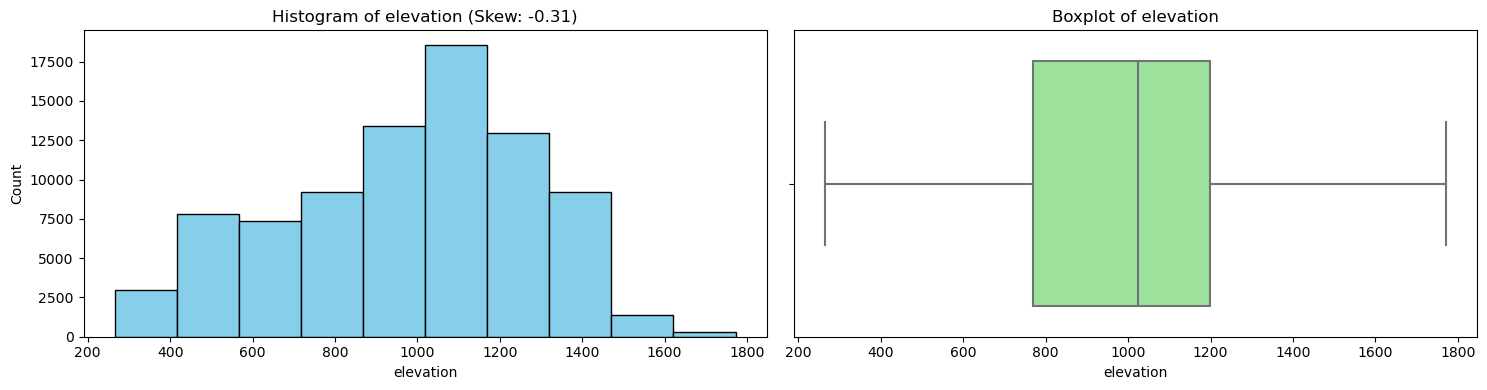

landcover_0
Skew: 11.91


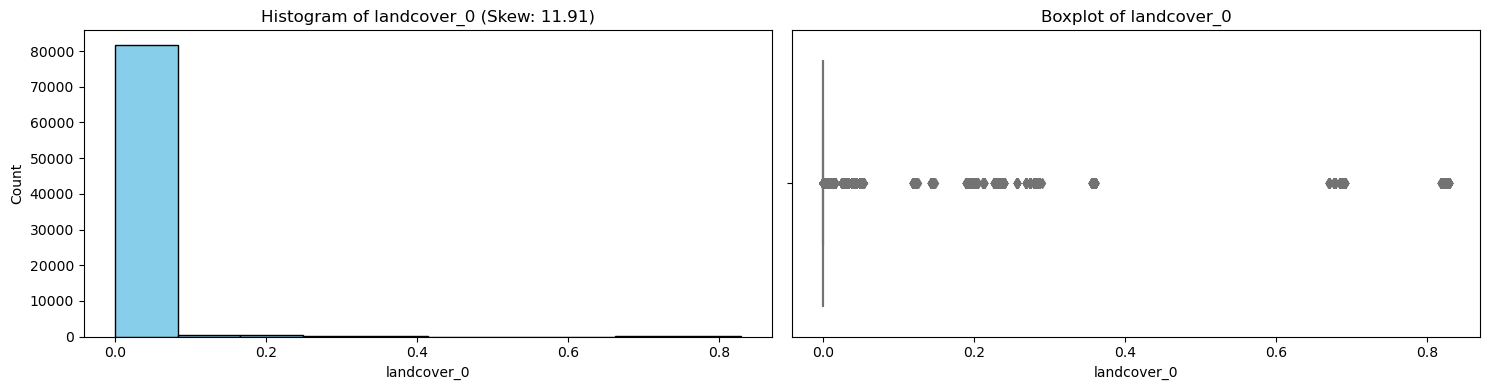

landcover_1
Skew: 14.94


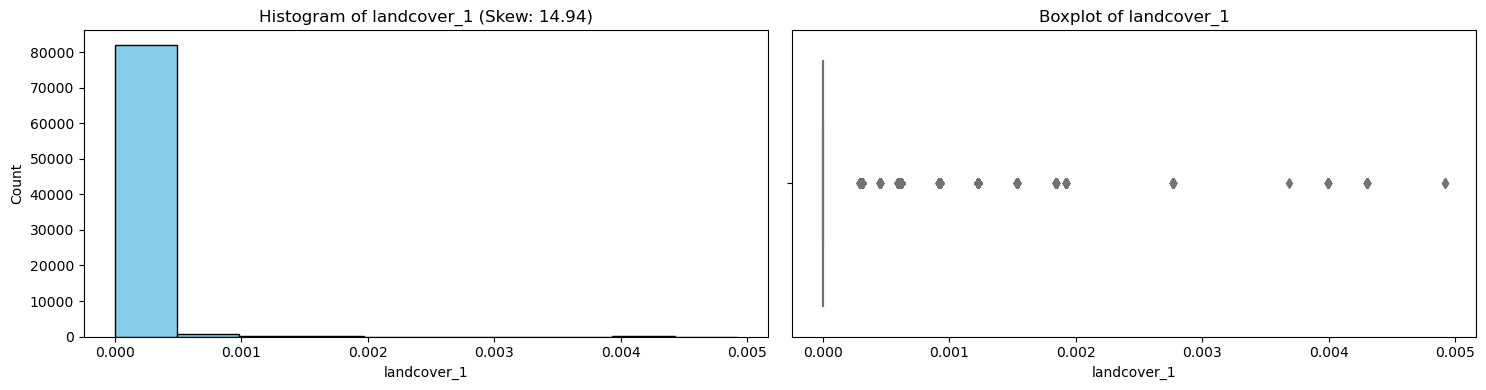

landcover_2
Skew: 8.58


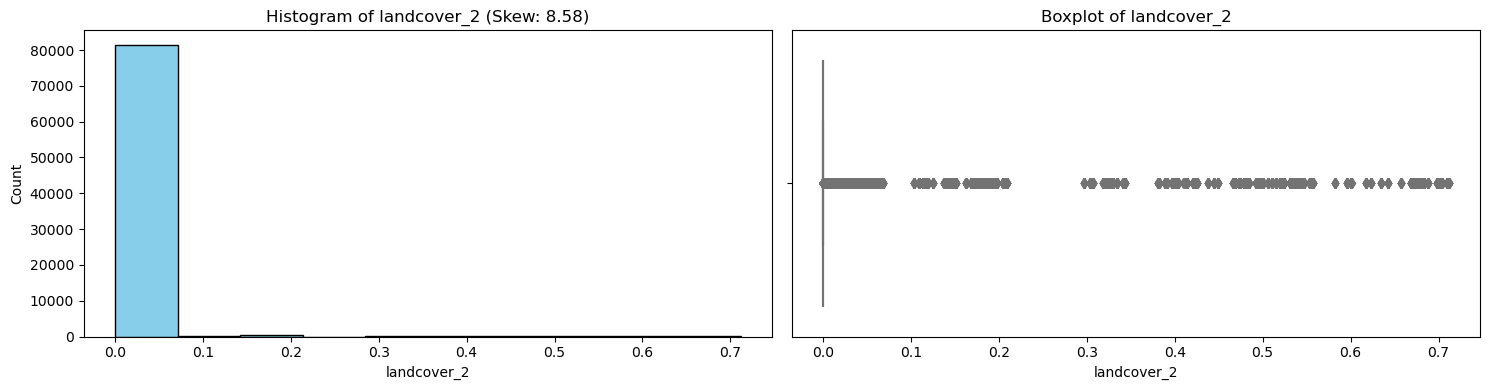

landcover_3
Skew: 86.93


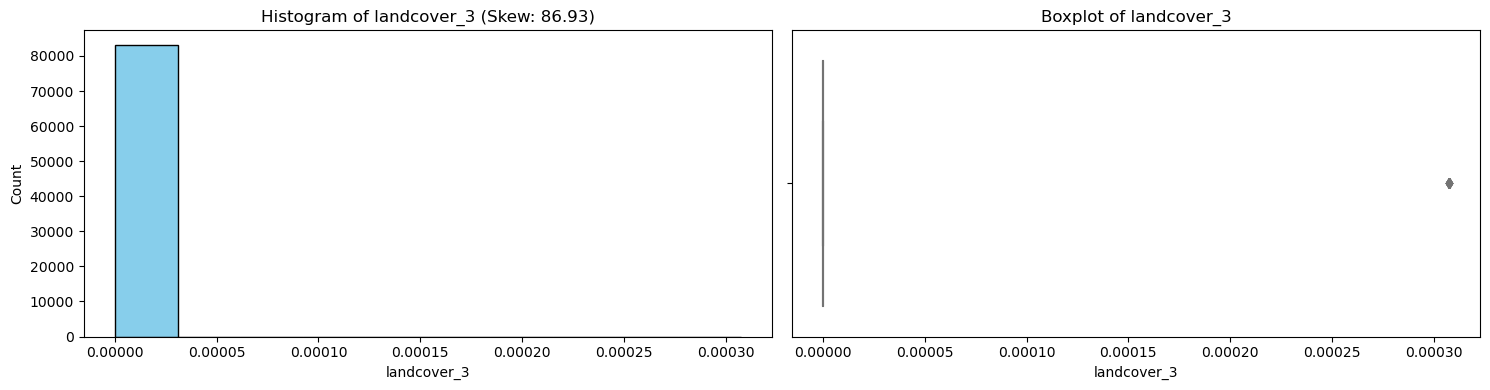

landcover_4
Skew: 1.52


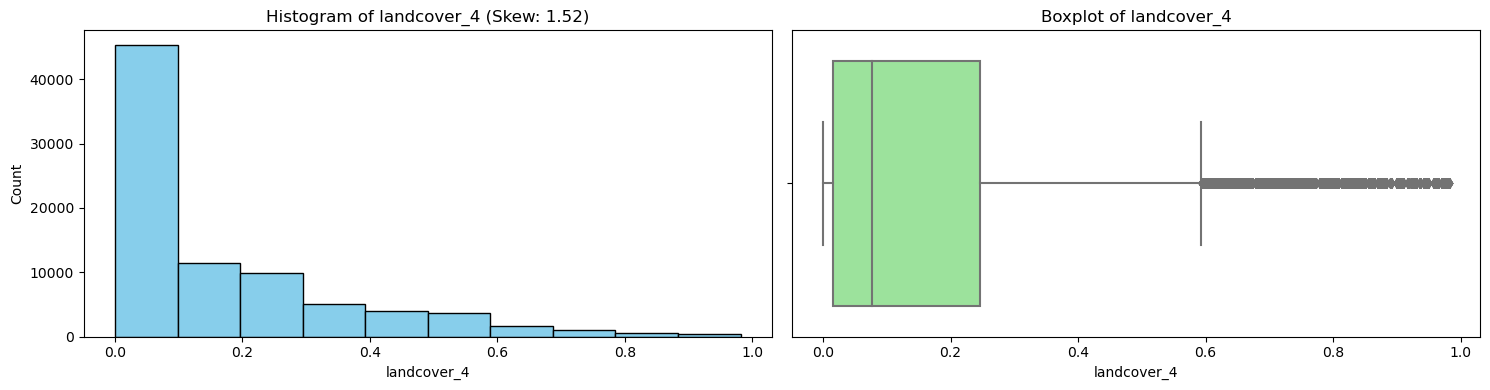

landcover_5
Skew: 4.31


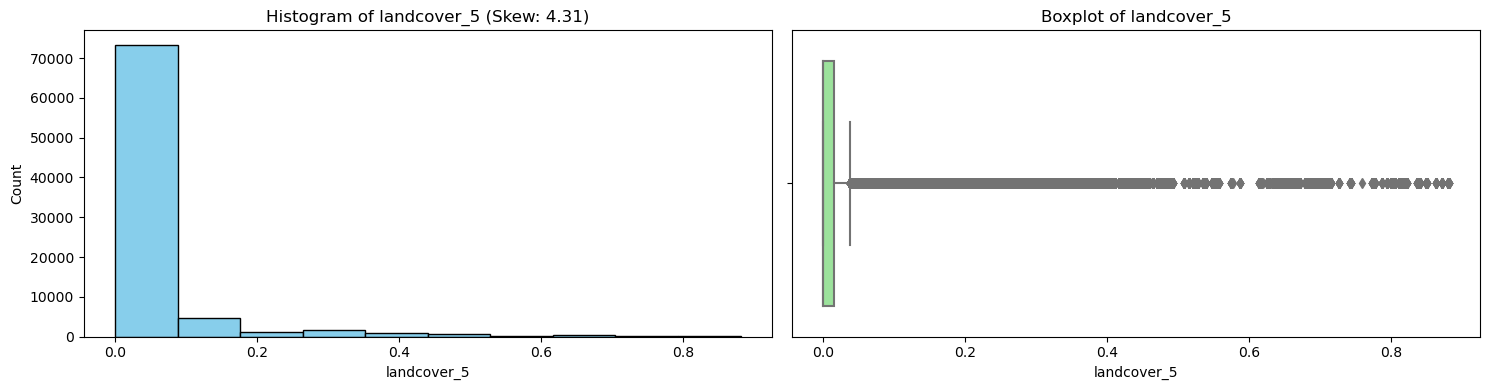

landcover_6
Skew: -1.25


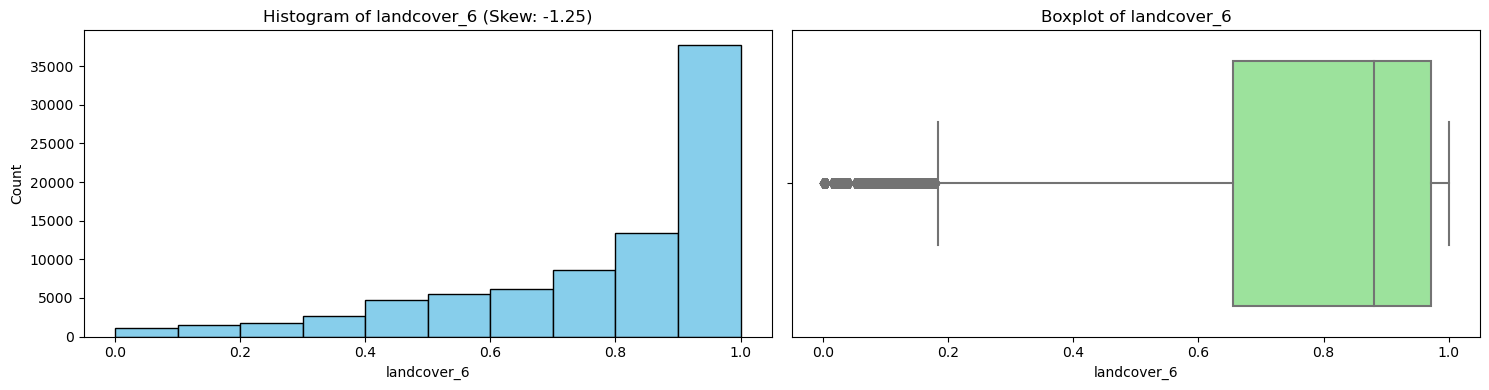

landcover_7
Skew: 6.25


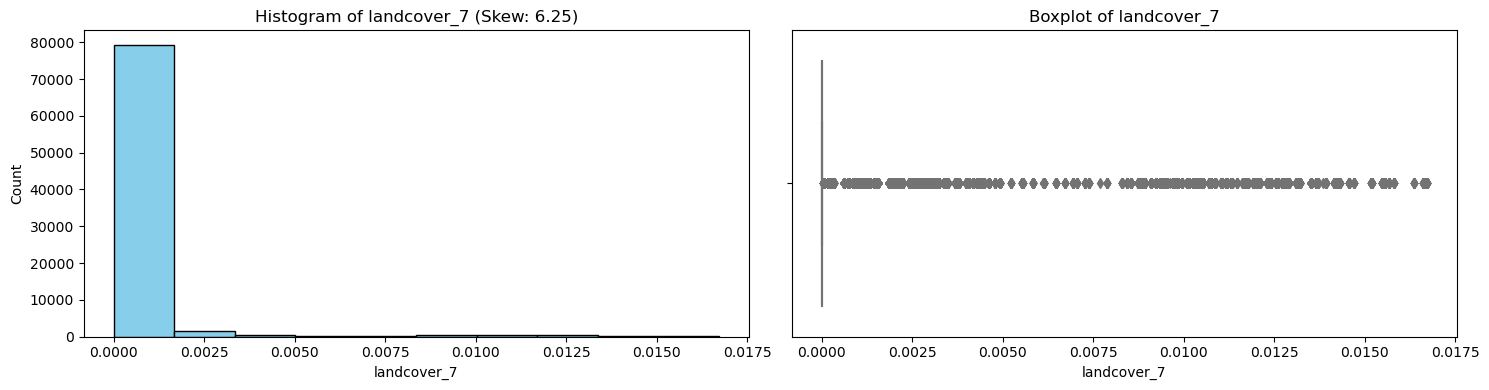

landcover_8
Skew: 17.03


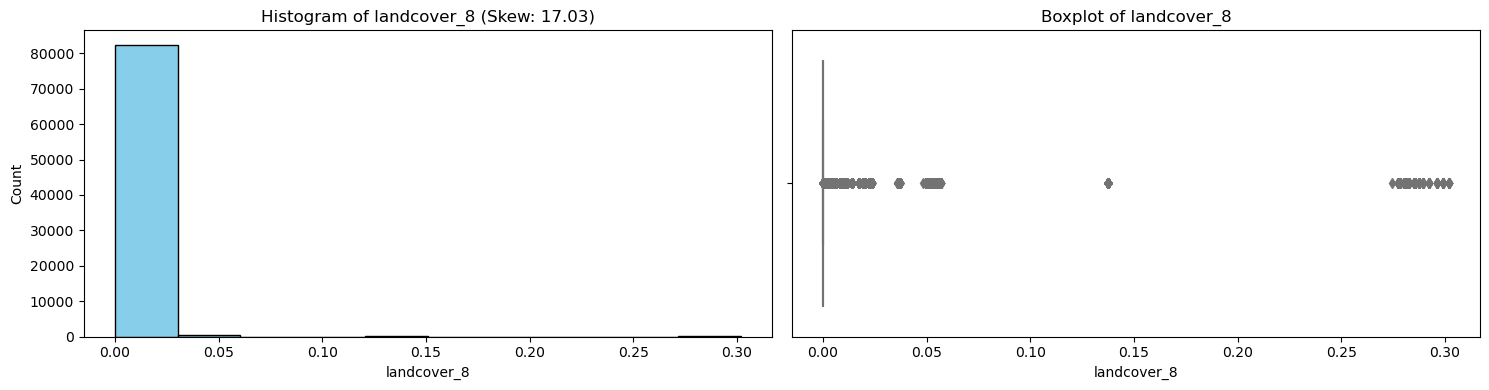

precipitation
Skew: 1.74


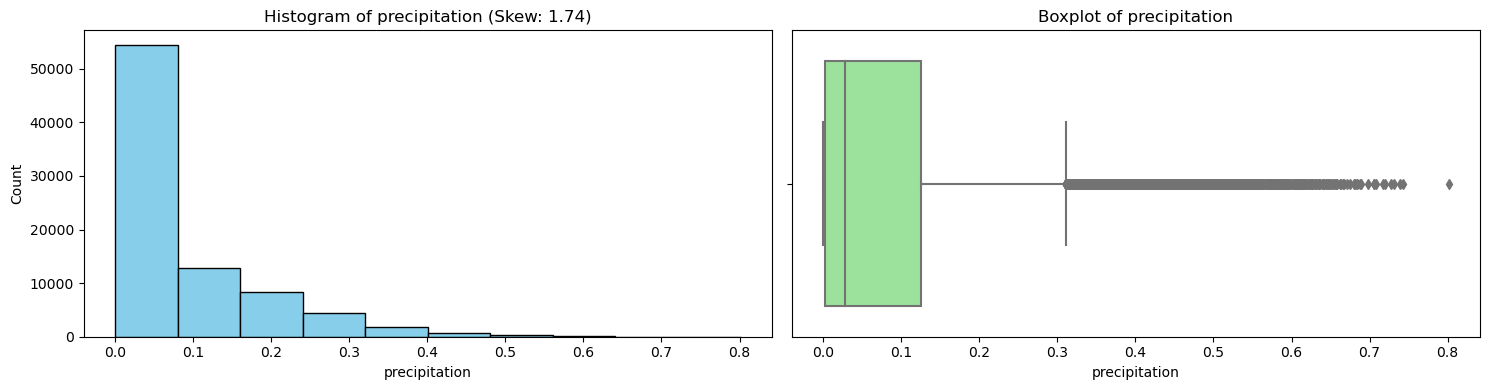

year
Skew: 0.0


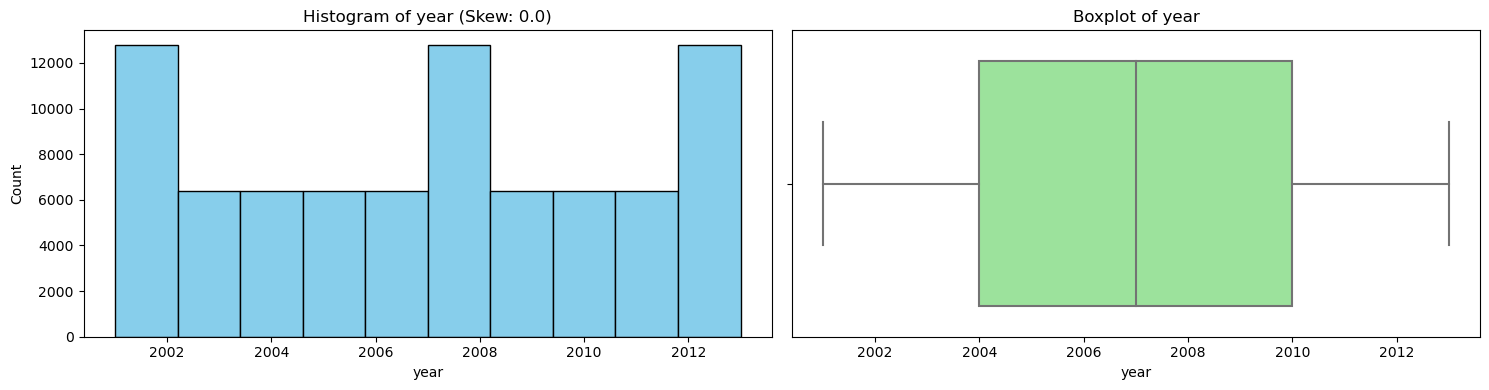

month
Skew: 0.0


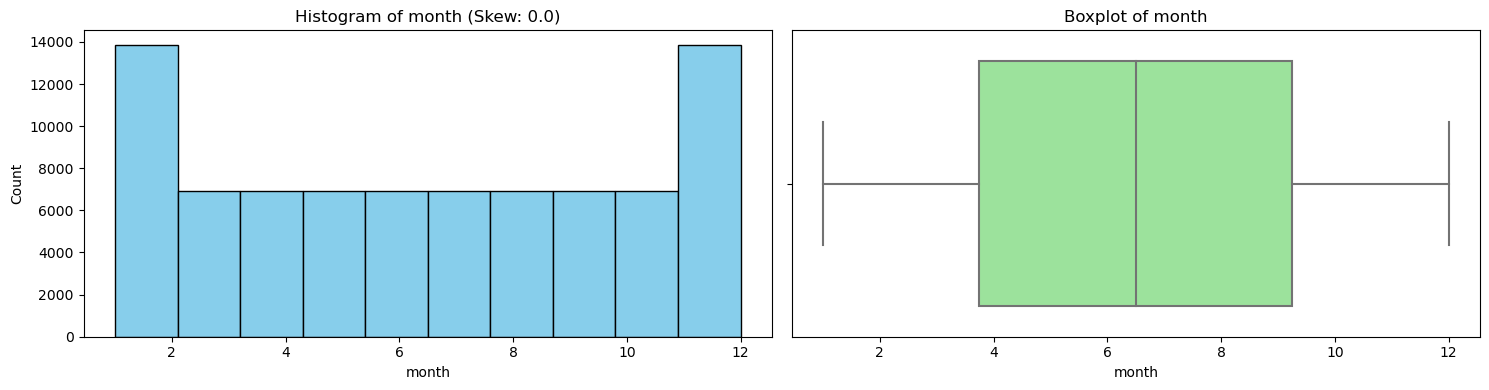

In [11]:
#check skew in numerical columns

for col in num_col:
    print(col)
    skew_value = train_data[col].skew()
    print('Skew:', round(skew_value, 2))
    
    plt.figure(figsize=(15, 4))
    
    # Histogram
    plt.subplot(1, 2, 1)
    plt.hist(x=train_data[col], bins=10, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {col} (Skew: {round(skew_value, 2)})')
    plt.xlabel(col)
    plt.ylabel('Count')
    
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=train_data[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    
    # Show the plots
    plt.tight_layout()
    plt.show()


In [43]:
#normalizing the data

def log_transform(train_data, col):
    for colname in col:
        # Always add 1 before taking the log to avoid issues with zero or negative values
        train_data[colname + '_log'] = np.log(train_data[colname] + 1)
    
    # Optionally print data info to see the changes
    train_data.info()

    return data


## Bivariate Analysis

<AxesSubplot:>

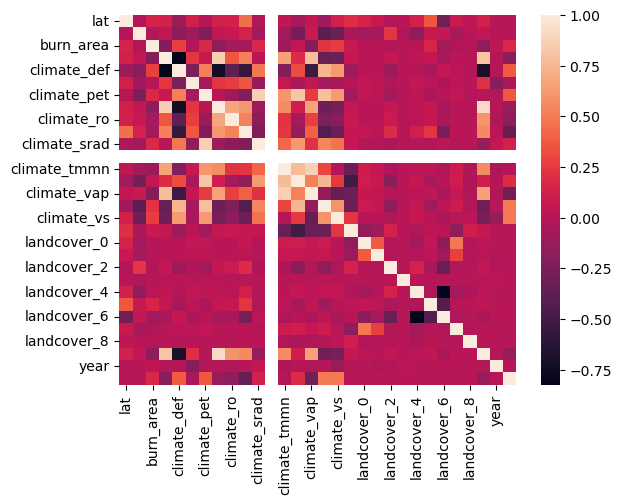

In [48]:
sns.heatmap(train_data.corr())

In [12]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83148 entries, 0 to 83147
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ID             83148 non-null  object        
 1   lat            83148 non-null  float64       
 2   lon            83148 non-null  float64       
 3   burn_area      83148 non-null  float64       
 4   climate_aet    83148 non-null  int64         
 5   climate_def    83148 non-null  int64         
 6   climate_pdsi   83148 non-null  int64         
 7   climate_pet    83148 non-null  int64         
 8   climate_pr     83148 non-null  int64         
 9   climate_ro     83148 non-null  int64         
 10  climate_soil   83148 non-null  int64         
 11  climate_srad   83148 non-null  int64         
 12  climate_swe    83148 non-null  int64         
 13  climate_tmmn   83148 non-null  int64         
 14  climate_tmmx   83148 non-null  int64         
 15  climate_vap    8314

In [13]:
#Calculate the monthly mean_burn_area
monthly_burn = train_data.groupby('month')['burn_area'].mean().reset_index()
monthly_burn

,month,burn_area
0,1,0.000076
1,2,0.000028
2,3,0.000063
3,4,0.000209
4,5,0.001085
5,6,0.002507
6,7,0.008927
7,8,0.024060
8,9,0.033967
9,10,0.017431


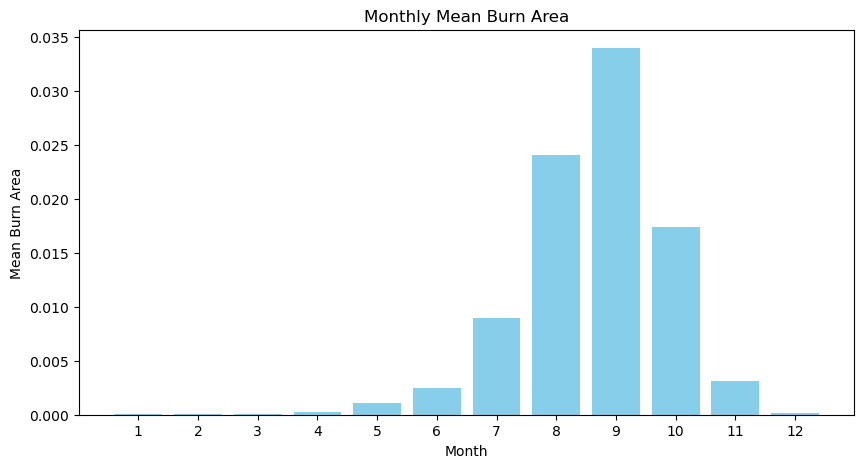

In [14]:
#plotting the result
plt.figure(figsize = (10,5))
plt.bar(monthly_burn['month'], monthly_burn['burn_area'], color='skyblue')
plt.xlabel('Month')
plt.ylabel('Mean Burn Area')
plt.title("Monthly Mean Burn Area")
plt.xticks(monthly_burn['month']);

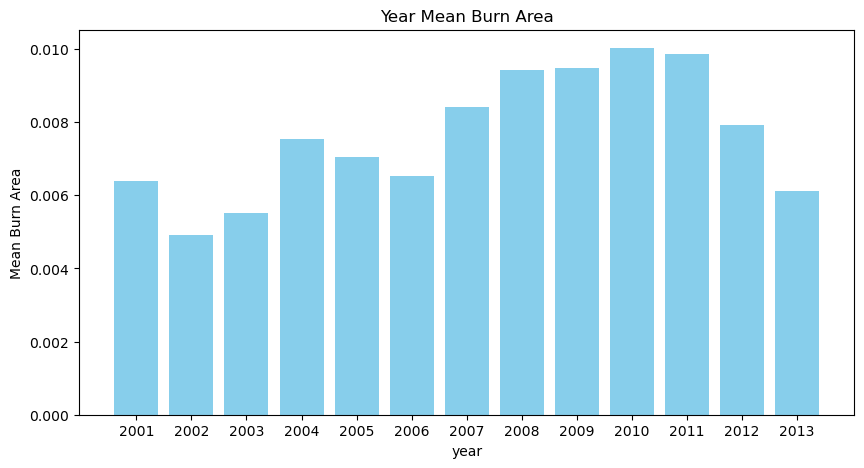

In [12]:
year_burn = train_data.groupby('year')['burn_area'].mean().reset_index()
#plotting the result
plt.figure(figsize = (10,5))
plt.bar(year_burn['year'], year_burn['burn_area'], color='skyblue')
plt.xlabel('year')
plt.ylabel('Mean Burn Area')
plt.title("Year Mean Burn Area")
plt.xticks(year_burn['year']);

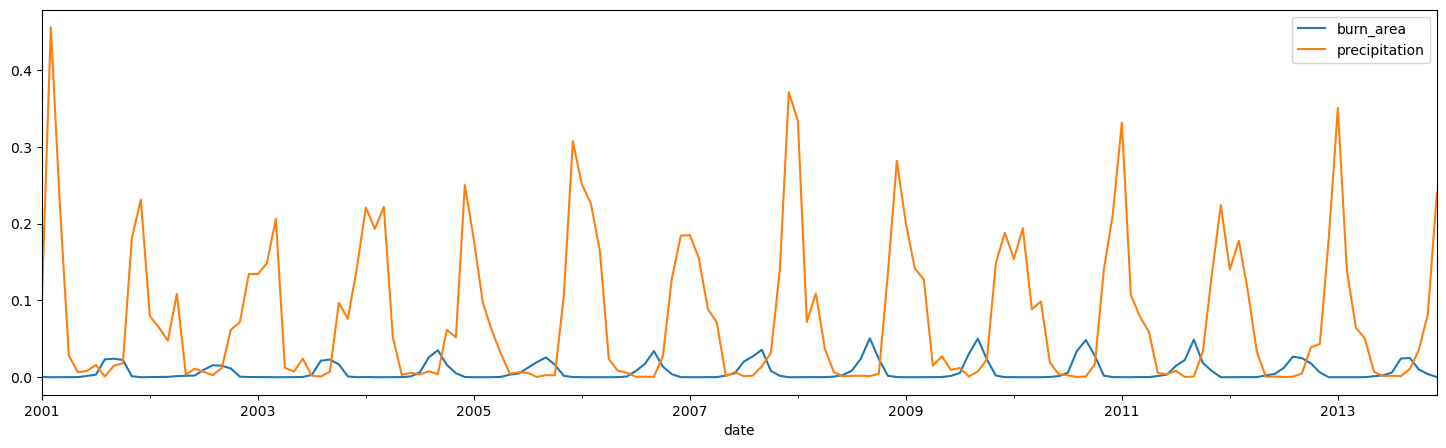

In [15]:
#convert burn_area to numeric so as to handle non numeric data
train_data['burn_area'] = pd.to_numeric(train_data['burn_area'], errors = 'coerce')
ax = train_data.groupby('date')['burn_area'].mean().reset_index().plot(x='date', y='burn_area', figsize=(18, 5))
train_data.groupby('date')['precipitation'].mean().reset_index().plot(x='date', y='precipitation',  ax=ax);

## Feature Selection

In [ ]:
def cor_selector(X, y,num_col):
    cor_list = []
    feature_name = X.columns.tolist()
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature
cor_support, cor_feature = cor_selector(X, y,num_feats)
print(str(len(cor_feature)), 'selected features')

In [19]:
#creating lagged variables
train_data['prev_month_precipitation'] = train_data['climate_pr'].shift(1)
train_data['prev_2month_precipitation'] = train_data['climate_pr'].shift(2)
train_data['prev_month_tmmx'] = train_data['climate_tmmx'].shift(1)
train_data['prev_2month_tmmx'] = train_data['climate_tmmx'].shift(2)
train_data.fillna(0, inplace = True)

In [20]:
# Create a peak rainfall feature
train_data['is_peak_rainfall'] = train_data['month'].apply(lambda x: 1 if x in [4, 11] else 0)
train_data.head()

,ID,lat,lon,burn_area,climate_aet,climate_def,climate_pdsi,climate_pet,climate_pr,climate_ro,...,landcover_8,precipitation,date,year,month,prev_month_precipitation,prev_2month_precipitation,prev_month_tmmx,prev_2month_tmmx,is_peak_rainfall
0,0_2001-01-01,-15.858835,29.237029,0.0,1195,0,263,1195,206,10,...,0.0,0.256932,2001-01-01,2001,1,0.0,0.0,0.0,0.0,0
1,1_2001-01-01,-15.858835,29.487029,0.0,1196,0,232,1196,201,10,...,0.0,0.273093,2001-01-01,2001,1,206.0,0.0,317.0,0.0,0
2,2_2001-01-01,-15.858835,29.737029,0.0,1190,0,314,1190,192,10,...,0.0,0.285109,2001-01-01,2001,1,201.0,206.0,318.0,317.0,0
3,3_2001-01-01,-15.858835,29.987029,0.0,1144,0,321,1144,186,66,...,0.0,0.298418,2001-01-01,2001,1,192.0,201.0,317.0,318.0,0
4,4_2001-01-01,-15.858835,30.237029,0.0,1187,0,413,1187,186,9,...,0.0,0.315621,2001-01-01,2001,1,186.0,192.0,303.0,317.0,0


In [21]:
train_data.drop(columns='ID', inplace = True)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83148 entries, 0 to 83147
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   lat                        83148 non-null  float64       
 1   lon                        83148 non-null  float64       
 2   burn_area                  83148 non-null  float64       
 3   climate_aet                83148 non-null  int64         
 4   climate_def                83148 non-null  int64         
 5   climate_pdsi               83148 non-null  int64         
 6   climate_pet                83148 non-null  int64         
 7   climate_pr                 83148 non-null  int64         
 8   climate_ro                 83148 non-null  int64         
 9   climate_soil               83148 non-null  int64         
 10  climate_srad               83148 non-null  int64         
 11  climate_swe                83148 non-null  int64         
 12  clim

## Climate AET

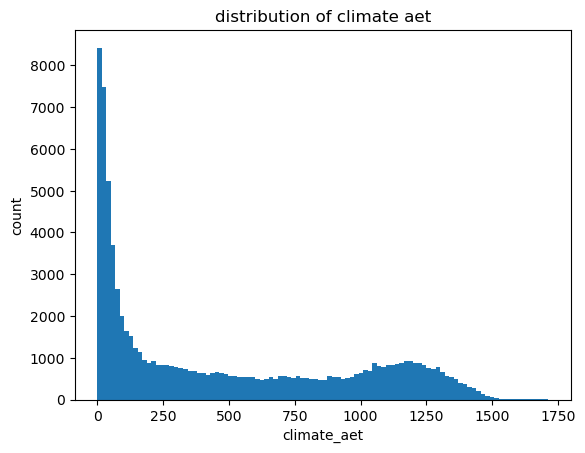

In [22]:
plt.hist(train_data['climate_aet'], bins = 100)
plt.xlabel('climate_aet')
plt.ylabel('count')
plt.title('distribution of climate aet');

In [23]:
train_data['climate_aet'].corr(train_data['burn_area']) #weak negative correlation. As 'climate_aet' increases, 'burn_area' decreases
                                                        #However this is quite weak so it is not entirely dependent. 

-0.2118055837834472

## Climate_def

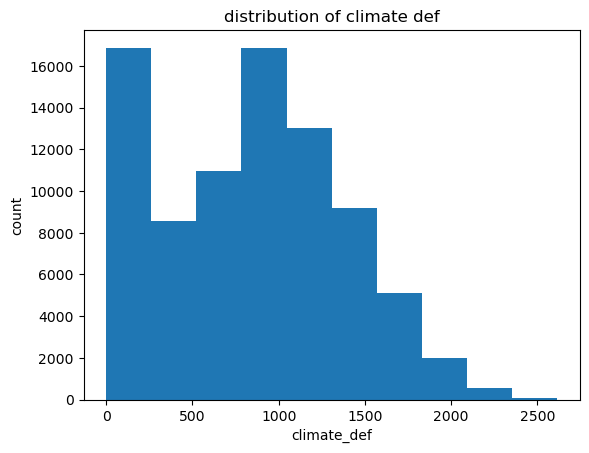

In [24]:
plt.hist(train_data['climate_def'], bins = 10)
plt.xlabel('climate_def')
plt.ylabel('count')
plt.title('distribution of climate def');

# Temperature

In [25]:
train_data['temp_range'] = train_data['climate_tmmx'] - train_data['climate_tmmn']
train_data.head()

,lat,lon,burn_area,climate_aet,climate_def,climate_pdsi,climate_pet,climate_pr,climate_ro,climate_soil,...,precipitation,date,year,month,prev_month_precipitation,prev_2month_precipitation,prev_month_tmmx,prev_2month_tmmx,is_peak_rainfall,temp_range
0,-15.858835,29.237029,0.0,1195,0,263,1195,206,10,1692,...,0.256932,2001-01-01,2001,1,0.0,0.0,0.0,0.0,0,106
1,-15.858835,29.487029,0.0,1196,0,232,1196,201,10,1859,...,0.273093,2001-01-01,2001,1,206.0,0.0,317.0,0.0,0,107
2,-15.858835,29.737029,0.0,1190,0,314,1190,192,10,1677,...,0.285109,2001-01-01,2001,1,201.0,206.0,318.0,317.0,0,109
3,-15.858835,29.987029,0.0,1144,0,321,1144,186,66,1061,...,0.298418,2001-01-01,2001,1,192.0,201.0,317.0,318.0,0,107
4,-15.858835,30.237029,0.0,1187,0,413,1187,186,9,1714,...,0.315621,2001-01-01,2001,1,186.0,192.0,303.0,317.0,0,110


In [27]:
#Average temperature
train_data['avg_temp'] = (train_data['climate_tmmx'] + train_data['climate_tmmn']) / 2

In [28]:
train_data['hot_and_dry'] = train_data['climate_tmmx'] * train_data['climate_def']

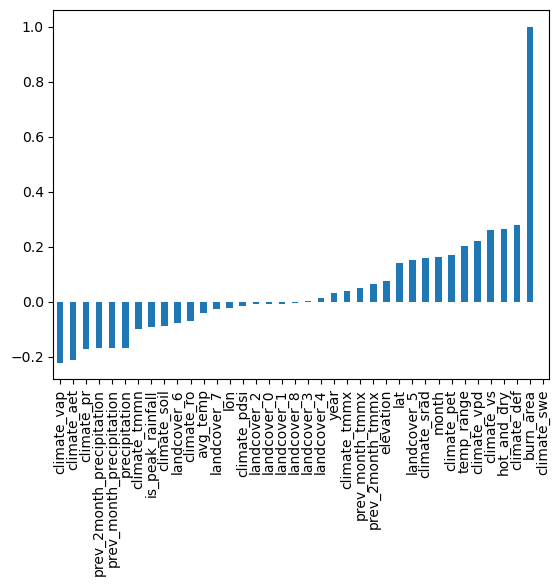

In [29]:
#checking correlation of burn_data with other columns
train_data.select_dtypes(include=['number']).corr()['burn_area'].sort_values().plot(kind='bar');

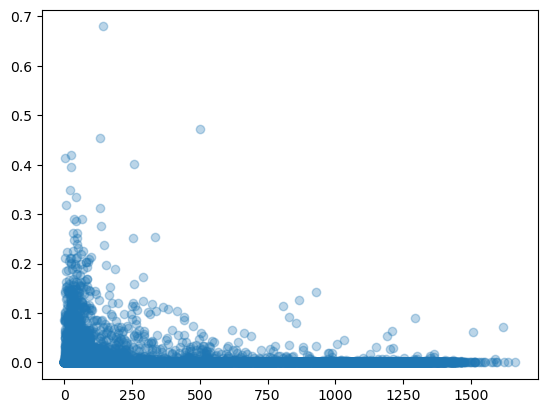

In [31]:
#looking at some scatter plots
sample = train_data.sample(10000)
plt.scatter(sample['climate_aet'], sample['burn_area'], alpha = 0.3);

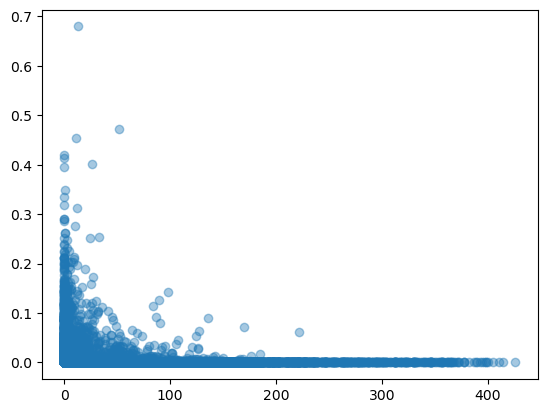

In [32]:
plt.scatter(sample['climate_pr'],sample['burn_area'], alpha = 0.4);

In [33]:
train_data['season'] = train_data['month'].apply(lambda x : 'dry' if x in [5,6,7,8,9] else 'wet')

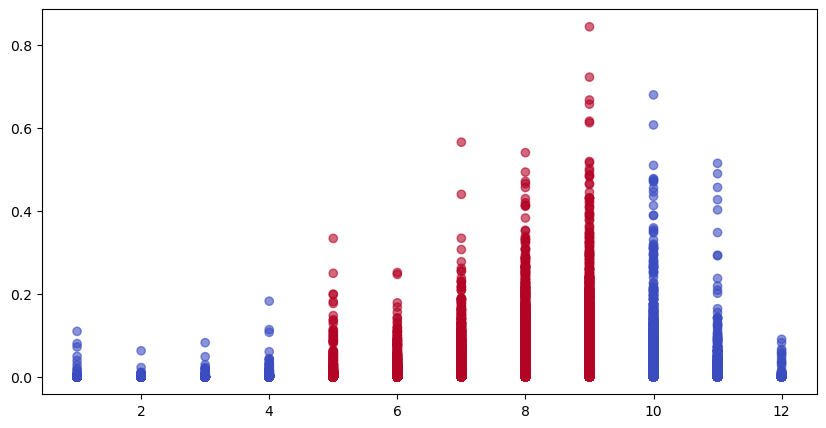

In [34]:
#creating a scatter plot of burn_area and month, colored by season
plt.figure(figsize = (10,5))
plt.scatter(train_data['month'], train_data['burn_area'], c=train_data['season'].
            apply(lambda x : 1 if x == 'dry' else 0), cmap='coolwarm', alpha =0.6);

## Splitting the data


In [35]:
train_all = train_data.copy().dropna()
train = train_all.loc[train_all.date < '2011-01-01']
valid = train_all.loc[train_all.date > '2011-01-01']
print(train.shape, valid.shape)

(63960, 40) (18655, 40)


## Transforming Training and Validation Data

In [36]:
features = [
    'climate_aet', 'climate_def', 'hot_and_dry', 'month',
    'climate_pdsi', 'climate_pet', 'climate_pr', 'climate_soil',
    'climate_srad', 'climate_tmmn', 'climate_vap', 'climate_vpd',
    'climate_vs', 'elevation', 'landcover_0', 'landcover_1',
    'landcover_2', 'landcover_3', 'landcover_4', 'landcover_5',
    'landcover_6', 'landcover_7', 'landcover_8', 'prev_month_precipitation',
    'prev_2month_precipitation', 'year', 'temp_range',
    'is_peak_rainfall', 'season', 'prev_month_tmmx', 'prev_2month_tmmx'
]

target = 'burn_area'

In [37]:
# Separate features and target
X_train = train[features]
y_train = train[target]
X_valid = valid[features]
y_valid = valid[target]

# Automatically identify categorical and numerical features
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_features = X_train.select_dtypes(include=['number']).columns.tolist()

# One-hot encode categorical features
X_train_categorical = pd.get_dummies(X_train[categorical_features], drop_first=True)
X_valid_categorical = pd.get_dummies(X_valid[categorical_features], drop_first=True)

# Ensure both train and valid sets have the same dummy variables
X_train_categorical, X_valid_categorical = X_train_categorical.align(X_valid_categorical, join='left', axis=1, fill_value=0)

# Scale numerical features
scaler = StandardScaler()
X_train_numerical_scaled = scaler.fit_transform(X_train[numerical_features])
X_valid_numerical_scaled = scaler.transform(X_valid[numerical_features])

# Convert scaled numerical features back to DataFrame
X_train_numerical_scaled_df = pd.DataFrame(X_train_numerical_scaled, columns=numerical_features, index=X_train.index)
X_valid_numerical_scaled_df = pd.DataFrame(X_valid_numerical_scaled, columns=numerical_features, index=X_valid.index)

# Combine scaled numerical features and encoded categorical features
X_train_combined = pd.concat([X_train_numerical_scaled_df, X_train_categorical], axis=1)
X_valid_combined = pd.concat([X_valid_numerical_scaled_df, X_valid_categorical], axis=1)

print(X_train_combined.shape, X_valid_combined.shape)


(63960, 31) (18655, 31)


## Building a model

In [71]:
# Create and fit the model
ridge_model = RidgeCV()
ridge_model.fit(X_train_combined, y_train)

# Make predictions
preds = model.predict(X_valid_combined)

# Score
mean_squared_error(y_valid, preds)**0.5 # RMSE - should match Zindi score. Lower is better

0.027252972589391376

## Random Forest model

In [81]:
# Initialize and train the model with different max_depth values
max_depths = [5, 10, 15, 20, None]  # None means no limit on depth
results = []

for max_depth in max_depths:
    random_forest_model = RandomForestRegressor(n_estimators=10, max_depth=max_depth, random_state=42)
    random_forest_model.fit(X_train_combined, y_train)


# Predict on the validation set
    y_pred = random_forest_model.predict(X_valid_combined)
    
    # Evaluate the model
    mse = mean_squared_error(y_valid, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_valid, y_pred)
    
     # Store the results
    results.append((max_depth, rmse, r2))
    
    # Print results for the current max_depth
    print(f"Max Depth: {max_depth}")
    print(f"  Root Mean Squared Error (RMSE): {rmse:.6f}")
    print(f"  R^2 Score: {r2:.6f}")
    print("-" * 40)

# Find the best max_depth based on RMSE
best_result = min(results, key=lambda x: x[1])  # Minimize RMSE

print("\nBest Result for RandomForestRegressor:")
print(f"  Max Depth: {best_result[0]}")
print(f"  Root Mean Squared Error (RMSE): {best_result[1]:.6f}")
print(f"  R^2 Score: {best_result[2]:.6f}")

Max Depth: 5
  Root Mean Squared Error (RMSE): 0.025050
  R^2 Score: 0.271744
----------------------------------------
Max Depth: 10
  Root Mean Squared Error (RMSE): 0.025620
  R^2 Score: 0.238265
----------------------------------------
Max Depth: 15
  Root Mean Squared Error (RMSE): 0.028816
  R^2 Score: 0.036332
----------------------------------------
Max Depth: 20
  Root Mean Squared Error (RMSE): 0.030238
  R^2 Score: -0.061097
----------------------------------------
Max Depth: None
  Root Mean Squared Error (RMSE): 0.030715
  R^2 Score: -0.094890
----------------------------------------

Best Result for RandomForestRegressor:
  Max Depth: 5
  Root Mean Squared Error (RMSE): 0.025050
  R^2 Score: 0.271744


In [86]:
# Find the best max_depth based on RMSE
best_max_depth = min(results, key=lambda x: x[1])[0]

print(f"\nBest Max Depth: {best_max_depth}")

# Initialize and train the best model
best_model = RandomForestRegressor(n_estimators=10, max_depth=best_max_depth, random_state=42)
best_model.fit(X_train_combined, y_train)

# Predict on the validation set with the best model
y_pred_best = best_model.predict(X_valid_combined)

# Evaluate the best model
mse_best = mean_squared_error(y_valid, y_pred_best)
rmse_best = np.sqrt(mse_best)
r2_best = r2_score(y_valid, y_pred_best)

print("\nEvaluation of Best Model on Validation Set:")
print(f"  Root Mean Squared Error (RMSE): {rmse_best:.6f}")
print(f"  R^2 Score: {r2_best:.6f}")

# Predict on the test set using the best model
preds = best_model.predict(X_test_combined)

# Prepare submission DataFrame
ss['burn_area'] = preds
ss['burn_area'] = ss['burn_area'].clip(0, 1)

# View submission DataFrame
print(ss.head())


Best Max Depth: 5

Evaluation of Best Model on Validation Set:
  Root Mean Squared Error (RMSE): 0.025050
  R^2 Score: 0.271744
             ID  burn_area
0  0_2014-01-01   0.004896
1  1_2014-01-01   0.004896
2  2_2014-01-01   0.000193
3  3_2014-01-01   0.000193
4  4_2014-01-01   0.000193


In [87]:
ss.to_csv('new_zindi_submission.csv', index=False)

## Test Data

In [45]:
test_data = pd.read_csv('Test.csv')
test_data.head()

,ID,lat,lon,climate_aet,climate_def,climate_pdsi,climate_pet,climate_pr,climate_ro,climate_soil,...,landcover_0,landcover_1,landcover_2,landcover_3,landcover_4,landcover_5,landcover_6,landcover_7,landcover_8,precipitation
0,0_2014-01-01,-15.858835,29.237029,1146,74,-451,1220,120,6,212,...,0.0,0.000615,0.015418,0.0,0.416704,0.023724,0.530016,0.013524,0.0,0.404243
1,1_2014-01-01,-15.858835,29.487029,1118,98,-405,1216,117,6,330,...,0.0,0.000000,0.000000,0.0,0.406436,0.000446,0.593118,0.000000,0.0,0.421489
2,2_2014-01-01,-15.858835,29.737029,1067,137,-468,1204,111,6,194,...,0.0,0.000000,0.000000,0.0,0.254791,0.000000,0.745209,0.000000,0.0,0.419122
3,3_2014-01-01,-15.858835,29.987029,969,187,-533,1156,101,5,78,...,0.0,0.000000,0.000000,0.0,0.219340,0.182153,0.598507,0.000000,0.0,0.404596
4,4_2014-01-01,-15.858835,30.237029,927,270,-505,1197,96,5,139,...,0.0,0.000000,0.000000,0.0,0.220239,0.097748,0.682013,0.000000,0.0,0.371100


## Adding new features to test as it was applied to train data

In [61]:
#convert ID to datetime and extract month and year
test_data['date'] = test_data['ID'].apply(lambda x: x.split('_')[1])
test_data['date'] = pd.to_datetime(test_data['date'])
#Extracting year and month
test_data['year'] = test_data['date'].dt.year
test_data['month'] = test_data['date'].dt.month


KeyError: 'ID'

In [62]:
test_data['season'] = test_data['month'].apply(lambda x : 'dry' if x in [5,6,7,8,9] else 'wet')

In [48]:
#creating lagged variables
test_data['prev_month_precipitation'] = test_data['climate_pr'].shift(1)
test_data['prev_2month_precipitation'] = test_data['climate_pr'].shift(2)
test_data['prev_month_tmmx'] = test_data['climate_tmmx'].shift(1)
test_data['prev_2month_tmmx'] = test_data['climate_tmmx'].shift(2)
test_data.fillna(0, inplace = True)

In [63]:
# Create a peak rainfall feature
test_data['is_peak_rainfall'] = test_data['month'].apply(lambda x: 1 if x in [4, 11] else 0)
test_data.head()

,lat,lon,climate_aet,climate_def,climate_pdsi,climate_pet,climate_pr,climate_ro,climate_soil,climate_srad,...,month,prev_month_precipitation,prev_2month_precipitation,prev_month_tmmx,prev_2month_tmmx,is_peak_rainfall,temp_range,avg_temp,hot_and_dry,season
0,-15.858835,29.237029,1146,74,-451,1220,120,6,212,1974,...,1,0.0,0.0,0.0,0.0,0,86,260.0,22422,wet
1,-15.858835,29.487029,1118,98,-405,1216,117,6,330,1973,...,1,120.0,0.0,303.0,0.0,0,88,260.0,29792,wet
2,-15.858835,29.737029,1067,137,-468,1204,111,6,194,1958,...,1,117.0,120.0,304.0,303.0,0,88,258.0,41374,wet
3,-15.858835,29.987029,969,187,-533,1156,101,5,78,1954,...,1,111.0,117.0,302.0,304.0,0,88,246.0,54230,wet
4,-15.858835,30.237029,927,270,-505,1197,96,5,139,1939,...,1,101.0,111.0,290.0,302.0,0,91,255.5,81270,wet


In [52]:
test_data['temp_range'] = test_data['climate_tmmx'] - test_data['climate_tmmn']
#Average temperature
test_data['avg_temp'] = (test_data['climate_tmmx'] + test_data['climate_tmmn']) / 2
test_data['hot_and_dry'] = test_data['climate_tmmx'] * test_data['climate_def']

In [51]:
test_data.drop(columns='ID', inplace = True)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25584 entries, 0 to 25583
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   lat                        25584 non-null  float64       
 1   lon                        25584 non-null  float64       
 2   climate_aet                25584 non-null  int64         
 3   climate_def                25584 non-null  int64         
 4   climate_pdsi               25584 non-null  int64         
 5   climate_pet                25584 non-null  int64         
 6   climate_pr                 25584 non-null  int64         
 7   climate_ro                 25584 non-null  int64         
 8   climate_soil               25584 non-null  int64         
 9   climate_srad               25584 non-null  int64         
 10  climate_swe                25584 non-null  int64         
 11  climate_tmmn               25584 non-null  int64         
 12  clim

In [64]:
# One-hot encode categorical features in the test data
X_test_categorical = pd.get_dummies(test_data[categorical_features], drop_first=True)

# Ensure the test data has the same columns as the training data
# If training data had more dummy variables, they need to be added to the test data
X_test_categorical = X_test_categorical.reindex(columns=X_train_categorical.columns, fill_value=0)


In [67]:
# Extract numerical features from test data
X_test_numerical = test_data[numerical_features]

# Apply the same scaling used for the training data (e.g., StandardScaler, MinMaxScaler)
X_test_numerical_scaled = scaler.transform(X_test_numerical)  # Assuming scaler was fitted on training data

# Convert scaled numerical features back to DataFrame
X_test_numerical_scaled_df = pd.DataFrame(X_test_numerical_scaled, columns=numerical_features, index=test_data.index)

# Combine scaled numerical features and encoded categorical features
X_test_combined = pd.concat([X_test_numerical_scaled_df, X_test_categorical], axis=1)


In [82]:
preds = random_forest_model.predict(X_test_combined)

# Prepare submission DataFrame
ss['burn_area'] = preds
ss['burn_area'] = ss['burn_area'].clip(0, 1)

# View submission DataFrame
print(ss.head())

             ID  burn_area
0  0_2014-01-01   0.019926
1  1_2014-01-01   0.001522
2  2_2014-01-01   0.000000
3  3_2014-01-01   0.000123
4  4_2014-01-01   0.000000


In [83]:
ss.to_csv('zindi_submission.csv', index=False)

## Sample Submission

In [54]:
ss = pd.read_csv('SampleSubmission.csv')
ss.head()

,ID,burn_area
0,0_2014-01-01,0
1,1_2014-01-01,0
2,2_2014-01-01,0
3,3_2014-01-01,0
4,4_2014-01-01,0
